In [1]:
from scipy.io import wavfile
import numpy as np
from functions import *
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
np.prod(x)

np.int64(3628800)

In [8]:
sample_rate, signal = wavfile.read('data/znormalizowane_327284/zdanie1_1.wav')
if signal.dtype != np.float32:
    signal = signal / np.max(np.abs(signal)) 
if signal.ndim == 2:
    signal = signal[:,0]

/tmp/ipykernel_7007/1125595975.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, signal = wavfile.read('data/znormalizowane_327284/zdanie1_1.wav')


In [9]:
sample_rate

22050

In [10]:
length=256
frame = signal[:256]
frame_freq = np.abs(FFT(frame))[::2]
frequencies = np.linspace(0, sample_rate/2, length//2)

Text(0, 0.5, 'Magnitude')

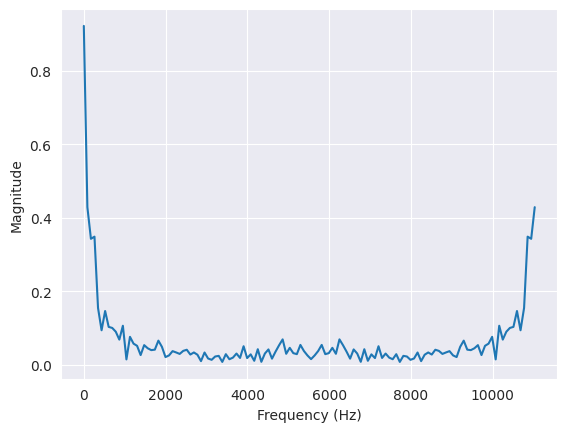

In [11]:
plt.plot(frequencies, frame_freq)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

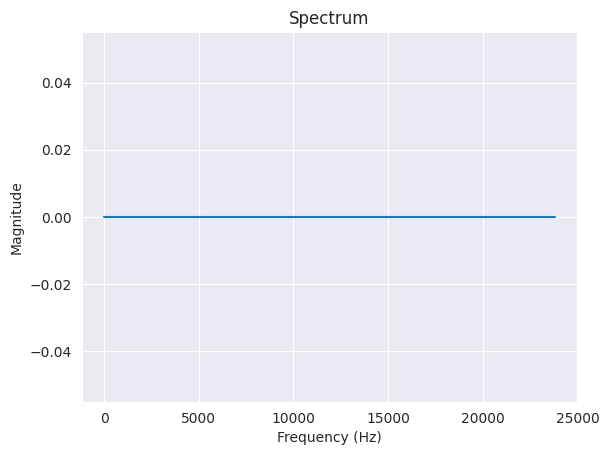

In [12]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

sr, x = wavfile.read("data/nutki/A4.wav")

# Convert to float if needed
if x.dtype != np.float32:
    x = x / np.max(np.abs(x))  # normalize to [-1, 1]

# If stereo, just take one channel
if x.ndim == 2:
    x = x[:, 0]

# FFT
X = np.fft.fft(x[:256])
freqs = np.fft.fftfreq(256, d=1/sr)

# Plot one-sided magnitude spectrum
plt.plot(freqs[:len(freqs)//2], np.abs(X[:len(X)//2]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Spectrum")
plt.grid(True)
plt.show()

In [36]:
import numpy as np

# Input array
signal = np.array([i for i in range(10)])

# Specify the fragment length
fragment_length = 5

# Divide the array into overlapping fragments
fragments = np.lib.stride_tricks.sliding_window_view(signal, window_shape=fragment_length)

print(fragments)

[[0 1 2 3 4]
 [1 2 3 4 5]
 [2 3 4 5 6]
 [3 4 5 6 7]
 [4 5 6 7 8]
 [5 6 7 8 9]]


In [5]:
from scipy.io import wavfile
import numpy as np
from functions import *
import matplotlib.pyplot as plt

sr, signal = wavfile.read('data/nutki/oktawka_pianka.wav')
if signal.dtype != np.float32:
    signal = signal / np.max(np.abs(signal)) 
if signal.ndim == 2:
    signal = signal[:,0]
    


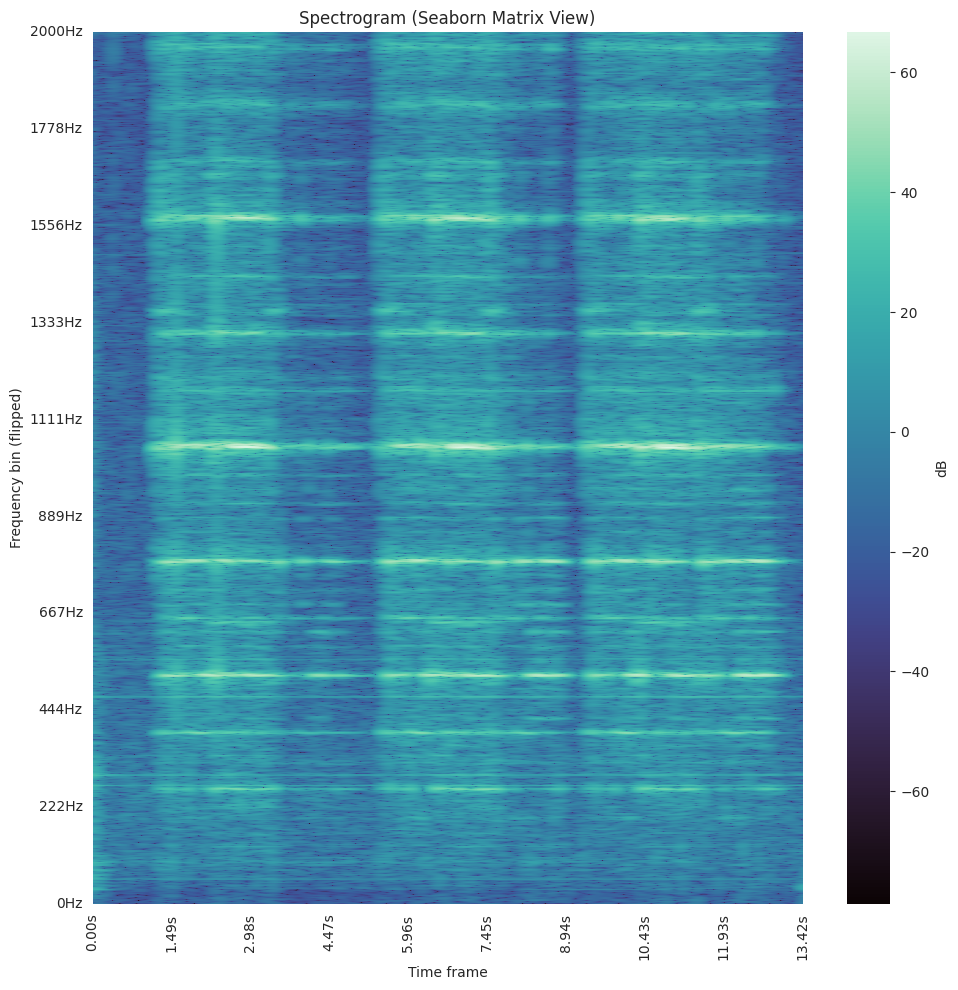

In [6]:
plot_spectrogram(sr, signal, 0.99, 0.4, 'blackman')

In [11]:
from scipy.io import wavfile
import numpy as np
from functions import *
import matplotlib.pyplot as plt

sr, signal = wavfile.read('data/znormalizowane_327284/aba_1.wav')
if signal.dtype != np.float32:
    signal = signal / np.max(np.abs(signal)) 
if signal.ndim == 2:
    signal = signal[:,0]

/tmp/ipykernel_10211/960936454.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, signal = wavfile.read('data/znormalizowane_327284/aba_1.wav')


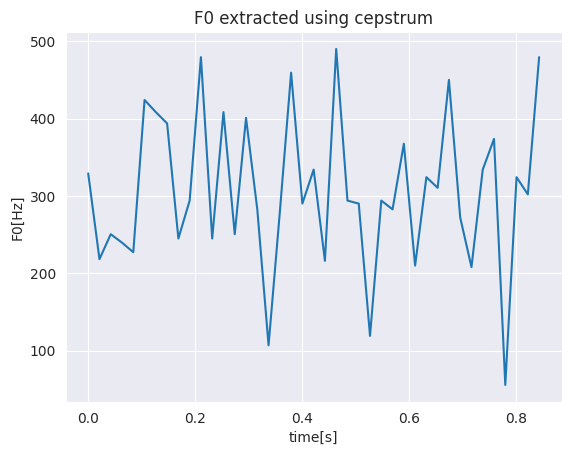

In [12]:
plot_f0_from_cepstrum(signal, sr)

In [32]:
signalic = signal[1000:5419]
f0_from_cepstrum(signalic, sr)

np.float64(441.0)

In [33]:
for i in range(820, 6000):
    signalic = signal[1000:1000+i]
    f0 = f0_from_cepstrum(signalic, sr)
    if f0<440:
        print(i)

820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
895
900
902
906
911
919
921
923
926
932
939
951
954
965
969
973
974
976
2205
2606
2706
3007
3107
3207
3408
3508
3608
3708
3809
3909
4009
4109
4210
4310
4410
4510
4577
4610
4711
4811
4911
5011
5111
5112
5145
5212
5312
5412
5479
5512
5513
5546
5612
5613
5646
5713
5813
5880
5913
5914


In [4]:
import numpy as np
np.var(np.array([-1,5]))


np.float64(9.0)

In [66]:
spec_db

array([[-200.        , -200.        , -200.        , ...,   10.06820882,
           8.60547655,    9.16061327],
       [-200.        , -200.        , -200.        , ...,   17.46360204,
           8.1562959 ,   11.92855156],
       [-200.        , -200.        , -200.        , ...,   16.03529171,
           6.45605263,   13.47075305],
       ...,
       [-200.        , -200.        , -200.        , ...,    9.918618  ,
          22.23812088,   14.58560788],
       [-200.        , -200.        , -200.        , ...,    7.93991145,
          21.91404747,   14.36947904],
       [-200.        , -200.        , -200.        , ...,    6.42584837,
          22.02718106,   13.38532207]])

In [67]:
num_frames = spec_db.shape[1]
num_freqs = spec_db.shape[0]

times = np.arange(num_frames) * (l//2) / sr
sr/=16

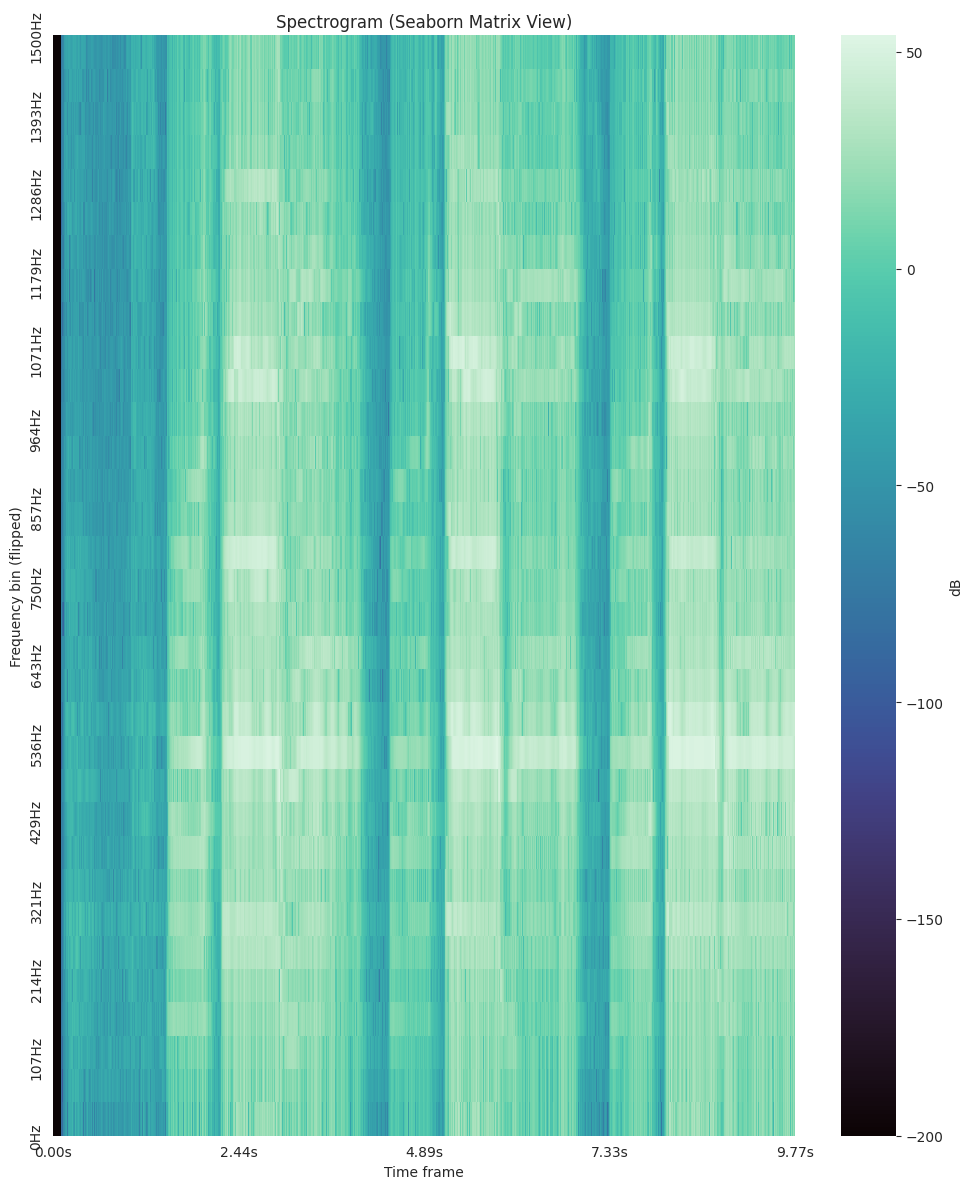

In [71]:
plt.figure(figsize=(10, 12))
sns.heatmap(spec_db, xticklabels=100, yticklabels=20, cmap='mako', cbar_kws={'label': 'dB'})

plt.xlabel("Time frame")
plt.ylabel("Frequency bin (flipped)")
plt.title("Spectrogram (Seaborn Matrix View)")
plt.xticks(np.linspace(0, num_frames, 5), labels=[f"{t:.2f}s" for t in np.linspace(0, times[-1], 5)])
plt.yticks(np.linspace(0, num_freqs, 15), labels=[f"{f:.0f}Hz" for f in np.linspace(sr/2, 0, 15)])
plt.tight_layout()
plt.show()

In [44]:
out = frame_signal(signal, frame_l)

In [4]:
out

array([[ 1.        ,  0.97338867,  0.94677734, ...,  0.50170898,
         0.47509766,  0.44848633],
       [ 0.7109375 ,  0.68432617,  0.65771484, ...,  0.21264648,
         0.18603516,  0.15942383],
       [ 0.421875  ,  0.39526367,  0.36865234, ..., -0.07641602,
        -0.10302734, -0.12955729],
       ...,
       [ 0.99633789,  0.9769694 ,  0.95035807, ...,  0.50528971,
         0.47875977,  0.45214844],
       [ 0.71451823,  0.6879069 ,  0.66129557, ...,  0.21630859,
         0.18969727,  0.16308594],
       [ 0.42553711,  0.39892578,  0.37231445, ...,  0.        ,
         0.        ,  0.        ]])

In [5]:
spec, frecje = dtft(out, sample_rate)

In [73]:
220*2**(1/4)

261.6255653005986

In [6]:
frecje

array([    0.        ,    43.06640625,    86.1328125 ,   129.19921875,
         172.265625  ,   215.33203125,   258.3984375 ,   301.46484375,
         344.53125   ,   387.59765625,   430.6640625 ,   473.73046875,
         516.796875  ,   559.86328125,   602.9296875 ,   645.99609375,
         689.0625    ,   732.12890625,   775.1953125 ,   818.26171875,
         861.328125  ,   904.39453125,   947.4609375 ,   990.52734375,
        1033.59375   ,  1076.66015625,  1119.7265625 ,  1162.79296875,
        1205.859375  ,  1248.92578125,  1291.9921875 ,  1335.05859375,
        1378.125     ,  1421.19140625,  1464.2578125 ,  1507.32421875,
        1550.390625  ,  1593.45703125,  1636.5234375 ,  1679.58984375,
        1722.65625   ,  1765.72265625,  1808.7890625 ,  1851.85546875,
        1894.921875  ,  1937.98828125,  1981.0546875 ,  2024.12109375,
        2067.1875    ,  2110.25390625,  2153.3203125 ,  2196.38671875,
        2239.453125  ,  2282.51953125,  2325.5859375 ,  2368.65234375,
      

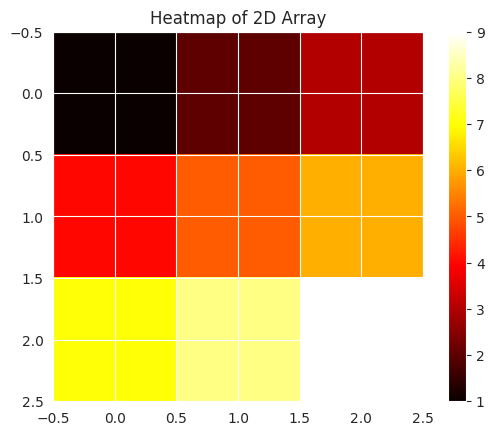

In [20]:
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])

plt.imshow(arr, cmap='hot', interpolation='nearest')
plt.colorbar()  # Add a color bar to indicate the values
plt.title('Heatmap of 2D Array')
plt.show()

In [21]:
spectrogram = spe
spectrogram = np.log(spectrogram + 1)
plt.figure(figsize=(10, 6))
plt.pcolormesh(np.arange(spectrogram.shape[1]+1), np.arange(spectrogram.shape[0]+1), spectrogram, shading='auto', cmap='hot')
plt.colorbar()  # Add a color bar to indicate the values
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

NameError: name 'spe' is not defined

In [12]:
list = spectrogram.reshape(-1,1)

In [23]:
sample_rate

48000

In [13]:
220*2**(1/4)

261.6255653005986